In [1]:
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
app_log=pd.read_csv(r"D:\Excelr Assignment\Data Scientist\6-Logistic Regression\bank-full.csv",sep=';')
app_log.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
app_log.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
columns=['age','balance','duration','campaign','y']
app_log_sel = app_log[columns]
app_log_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


<Axes: xlabel='age'>

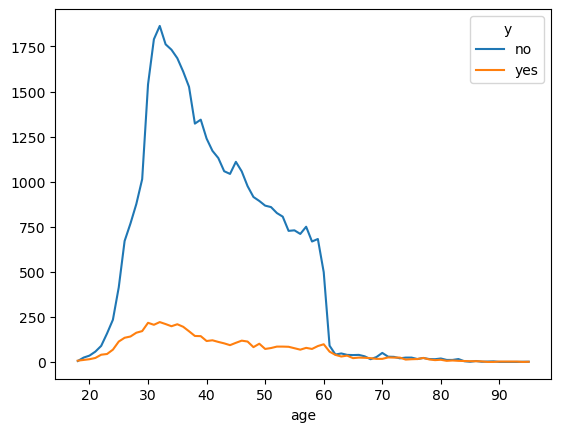

In [6]:
pd.crosstab(app_log_sel.age,app_log_sel.y).plot(kind="line")

<Axes: >

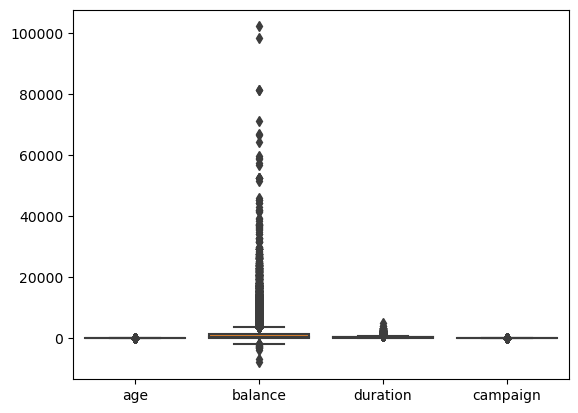

In [7]:
sb.boxplot(data=app_log_sel,orient="v")

In [8]:
app_log_sel['outcome']=app_log_sel.y.map({'no':0,'yes':1})
app_log_sel.tail(10)

,age,balance,duration,campaign,y,outcome
45201,53,583,226,1,yes,1
45202,34,557,224,1,yes,1
45203,23,113,266,1,yes,1
45204,73,2850,300,1,yes,1
45205,25,505,386,2,yes,1
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


<Axes: title={'center': 'age'}, xlabel='outcome'>

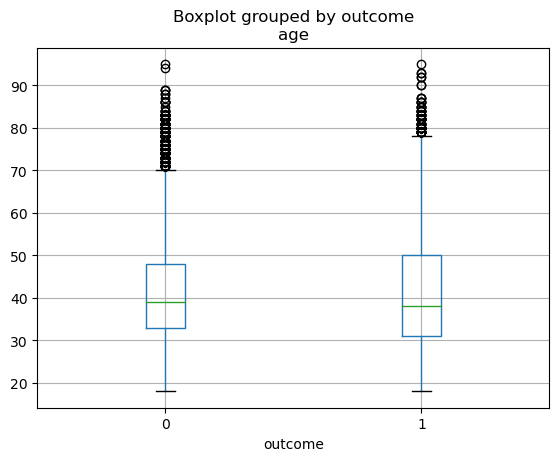

In [9]:
app_log_sel.boxplot(column='age',by='outcome')

In [10]:
feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X = app_log_sel[feature_col]
Y = app_log_sel[output_target]

In [11]:
classifier = LogisticRegression()

In [12]:
classifier.fit(X,Y)

LogisticRegression()

In [13]:
classifier.coef_

array([[ 7.69721796e-03,  3.72191058e-05,  3.54908905e-03,
        -1.39828316e-01]])

In [14]:
classifier.predict_proba (X)

array([[0.87367389, 0.12632611],
       [0.92488732, 0.07511268],
       [0.94596321, 0.05403679],
       ...,
       [0.30553762, 0.69446238],
       [0.82336233, 0.17663767],
       [0.86407825, 0.13592175]])

In [15]:
y_pred=classifier.predict(X)

In [16]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
confusion_matrix = confusion_matrix(Y,y_pred)

In [19]:
print(confusion_matrix)

[[39342   580]
 [ 4435   854]]


In [20]:
import matplotlib.pyplot as plt

Text(0.5, 23.52222222222222, 'Predicted Label')

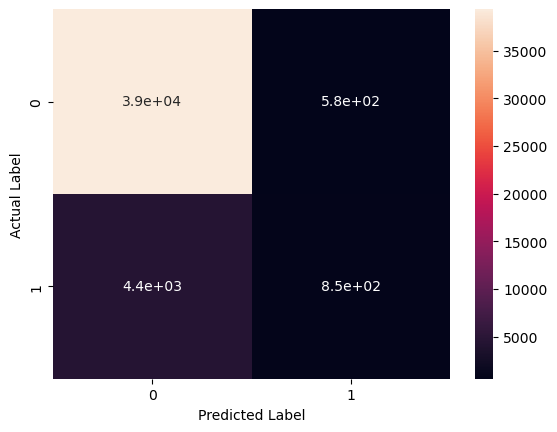

In [21]:
sb.heatmap(confusion_matrix,annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [22]:
print('Accuracy Of Logistic Regression Classifier : {:.2f}'.format(classifier.score(X,Y)))

Accuracy Of Logistic Regression Classifier : 0.89


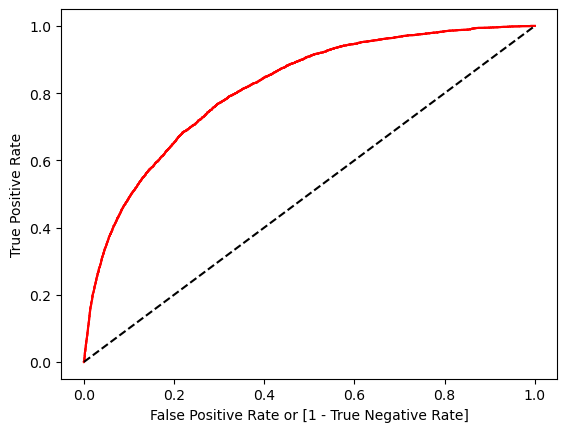

auc accuracy: 0.5734694329116669


In [23]:
fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(Y,y_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)